In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Cosmic Ray Removal

## Example on synthetic spectra

The first demonstration of the cosmic ray removal algorithm is performed on synthetically generated spectra. The spectra are generated using the `nylon` preset from the `synthetic.py` library. This step yields reference spectra without cosmic rays (CRs). Then, *fake* CRs are manually added. Finally, the CR removal algorithm is used on the spectra to which CRs were added. The results are compared to the original *synthetic* spectra prior to the addition of *fake* cosmic rays.

To test the performance of the algorithm, 6 *synthetic* spectra are used. Each with an increasing difficulty in the automatic detection and removal of the cosmic ray. The hardest level proves to be a challenge even with visual assesment from a person.

In [2]:
from orpl.synthetic import gen_synthetic_spectrum

### Generation of synthetic spectra without CRs

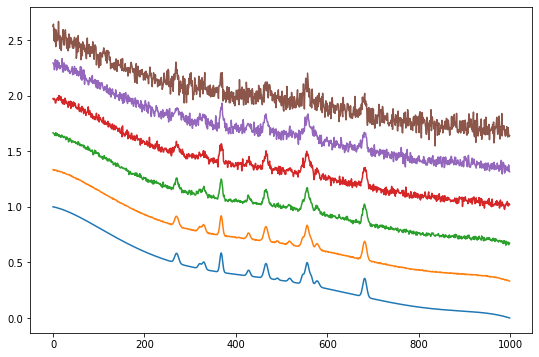

In [3]:
# Generates 3 clean (no CR) spectra with different SNRs
s_clean = []
for n_level in [0, 1, 5, 10, 15, 30]:
    s,_,_,_ = gen_synthetic_spectrum(preset='nylon',
                                     rb_ratio=0.2,
                                     noise_std=n_level/500)
    s_clean.append(s)

# Plotting clean spectra
fh = plt.figure(figsize=[9, 6])
for i in range(len(s_clean)):
    plt.plot(s_clean[i]+i/3)

### Adding *fake* cosmic rays to spectra

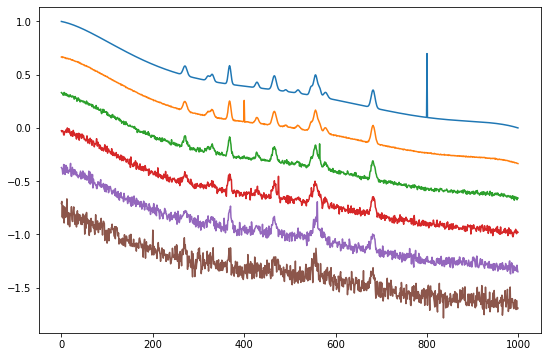

In [4]:
# Adding cosmic rays
# %matplotlib qt
# s_cr = copy.deepcopy(s_clean)
s_cr = [s.copy() for s in s_clean]

s_cr[0][800] += 0.6 # Trivial
s_cr[1][400] += 0.2 # easy
s_cr[2][565] += 0.15 # average
s_cr[3][475] += 0.2 # hard
s_cr[4][560] += 0.2 # impossible
s_cr[5][200] += 0.2 # f*** off

# Plotting CR spectra
fh = plt.figure(figsize=[9, 6])
for i in range(len(s_cr)):
    plt.plot(s_cr[i]-i/3)

### Single signal filter

The `crfilter_single()` function should be used when filtering individual spectrum.

Text(0.5, 1.0, 'Spectra after removal')

<Figure size 1512x432 with 0 Axes>

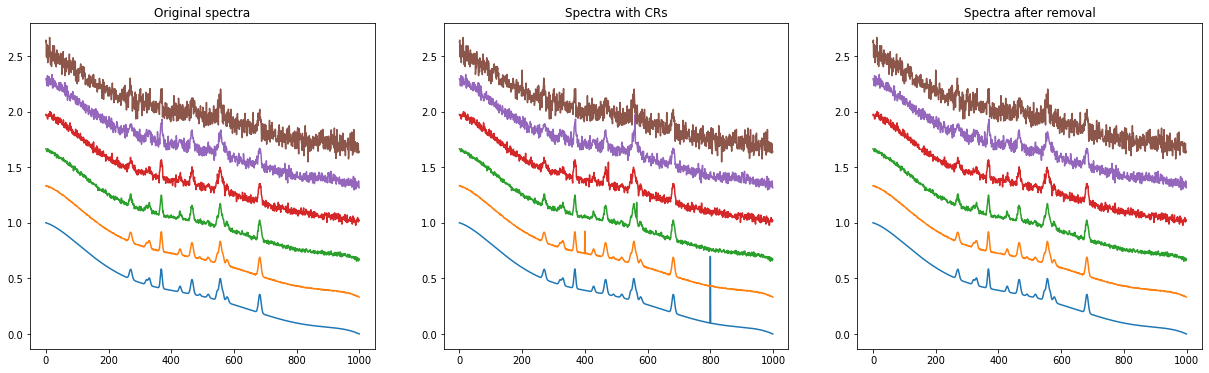

In [5]:
# Importing cosmic ray removal
from orpl.cosmic_ray import crfilter_single

# Removing cosmic rays
plt.figure(figsize=[21, 6])
s_removed = []
i = 0
for s in  s_cr:
    sr = crfilter_single(s)
    s_removed.append(sr)

# Plotting results
fh = plt.figure(figsize=[21, 6])
axs = fh.subplots(1, 3)

# Plotting clean spectra
for i in range(len(s_clean)):
    axs[0].plot(s_clean[i]+i/3)
axs[0].set_title('Original spectra')

# Plotting CR spectra
for i in range(len(s_cr)):
    axs[1].plot(s_cr[i]+i/3)
axs[1].set_title('Spectra with CRs')

# Plotting CR removed spectra
for i in range(len(s_removed)):
    axs[2].plot(s_removed[i]+i/3)
axs[2].set_title('Spectra after removal')

# plt.savefig('CR_demo.svg')

## Example on measured spectra

As an example on *real* experimental data, the cosmic ray present in the 26th acquisition of the `bacon.json` experiment is removed.

The `crfilter_multi()` function should be used when filtering acquisitions of multiple signals.

In [6]:
from orpl.cosmic_ray import crfilter_multi

# Loading bacon.json
import json

data = json.load(open('data/samples/bacon/bacon.json'))
spectra = np.array(data[25]['RawSpectra']).T

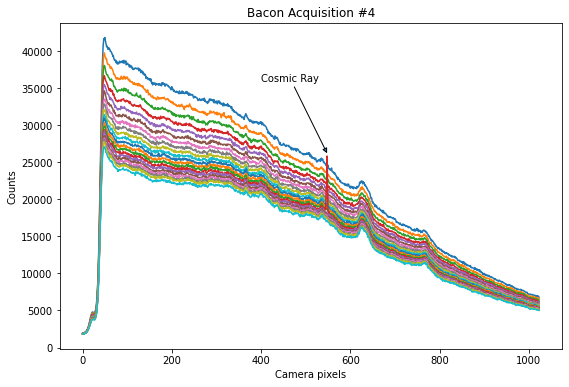

In [7]:
# Ploting acquisition before CR removal
plt.figure(figsize=[9,6])
for s in spectra:
    plt.plot(s)
plt.annotate('Cosmic Ray', (550, 26000), xytext=(400, 36000),
             arrowprops=dict(arrowstyle='-|>'))
plt.title('Bacon Acquisition #4');
plt.xlabel('Camera pixels')
plt.ylabel('Counts');
# plt.savefig('bacon_cr.svg')

In [8]:
# CR removal
spectra_filtered = crfilter_multi(spectra)

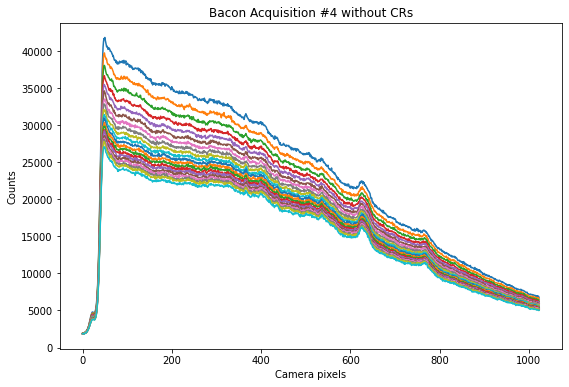

In [9]:
# Ploting acquisition after CR removal
plt.figure(figsize=[9,6])
for s in spectra_filtered:
    plt.plot(s);
plt.title('Bacon Acquisition #4 without CRs');
plt.xlabel('Camera pixels')
plt.ylabel('Counts');